# Performance comparison

## x86

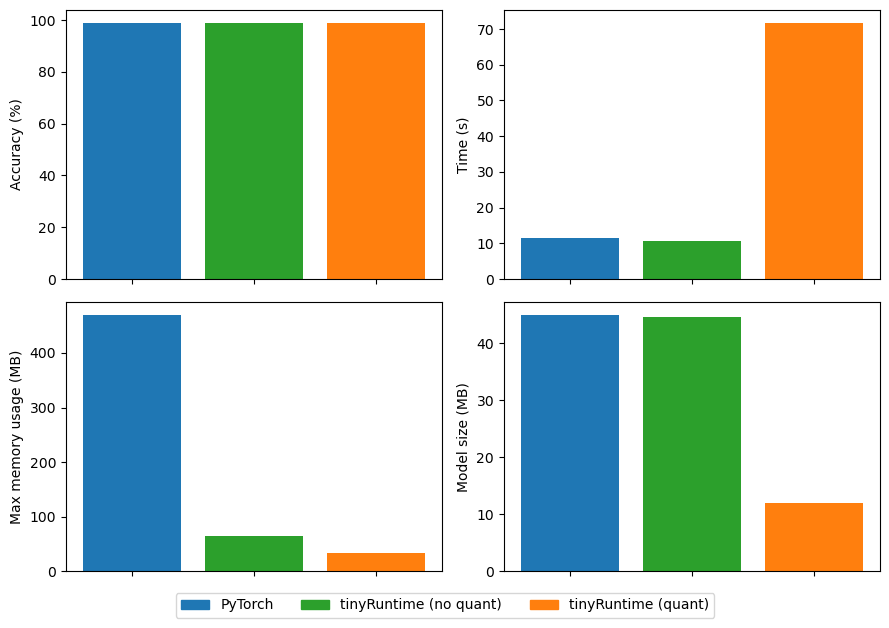

In [148]:
#| label: fig-x86
#| fig-cap: "Performance comparison on x86"

import pandas as pd
import matplotlib.pyplot as plt

def split_dataframe(df):
    '''Split dataframe based on Runtime (Pytorch, tinyRuntime (no quant) and tinyRuntime (quant).'''
    df_pytorch = df[df["Runtime"] == "PyTorch"]
    df_trv = df[(df["Runtime"] == "tinyRuntime") & (df["Quantization"] == False)]
    df_trq = df[(df["Runtime"] == "tinyRuntime") & (df["Quantization"] == True)]
    return df_pytorch, df_trv, df_trq

def plot_runtime_result(ax, column, df_pytorch, df_trv, df_trq, ylabel):
    '''Plot the latest performance comparison based on the selected column.'''
    x = ["PyTorch", "tinyRuntime (no quant)", "tinyRuntime (quant)"]
    y = [df[column].values[-1] for df in [df_pytorch, df_trv, df_trq]]
    bar_colors = ['tab:blue', 'tab:green', 'tab:orange']
    bars = ax.bar(x, y, color=bar_colors)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels([])

def plot_perf_comp(df):
    '''Plot latest performance comparisons.'''
    df_pytorch, df_trv, df_trq = split_dataframe(df)
    
    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(9, 6), sharex=True)
    plot_runtime_result(axs[0, 0], "Accuracy", df_pytorch, df_trv, df_trq, "Accuracy (%)")
    plot_runtime_result(axs[0, 1], "Time", df_pytorch, df_trv, df_trq, "Time (s)")
    plot_runtime_result(axs[1, 0], "Max memory", df_pytorch, df_trv, df_trq, "Max memory usage (MB)")
    plot_runtime_result(axs[1, 1], "Model size", df_pytorch, df_trv, df_trq, "Model size (MB)")
    
    # Create a single legend for all subplots
    labels = ["PyTorch", "tinyRuntime (no quant)", "tinyRuntime (quant)"]
    bar_colors = ['tab:blue', 'tab:green', 'tab:orange']
    patches = [plt.Rectangle((0, 0), 1, 1, color=bar_colors[i], label=labels[i]) for i in range(len(labels))]
    fig.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)
    
    plt.tight_layout()
    plt.show()

df = pd.read_csv('benchmark.csv')
df_x86 = df[df["Platform"] == "x86_64"]
plot_perf_comp(df_x86)

## ARM

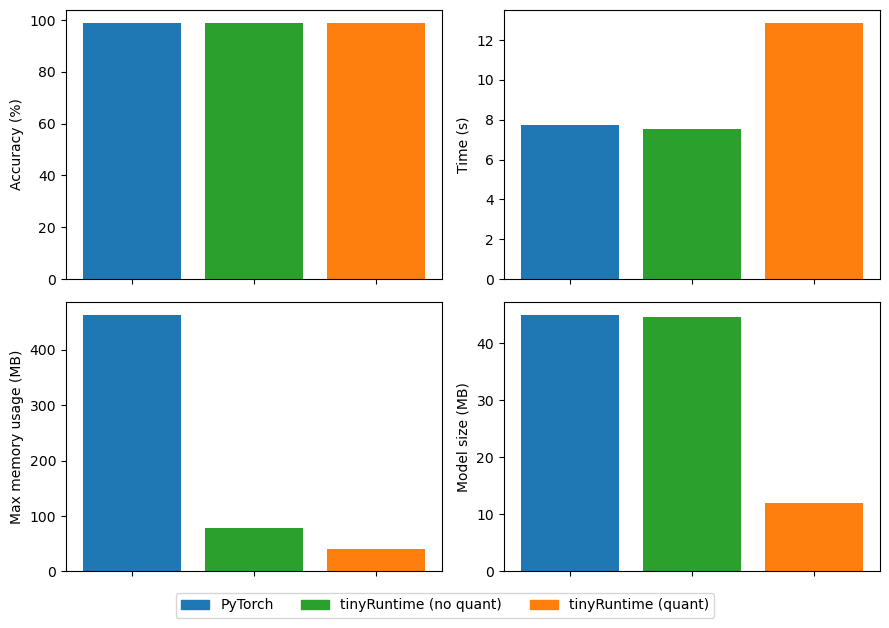

In [153]:
#| label: fig-arm
#| fig-cap: "Performance comparison on ARM"

df_arm = df[df["Platform"] == "arm64"]
plot_perf_comp(df_arm)

# Runtime Optimization Progress

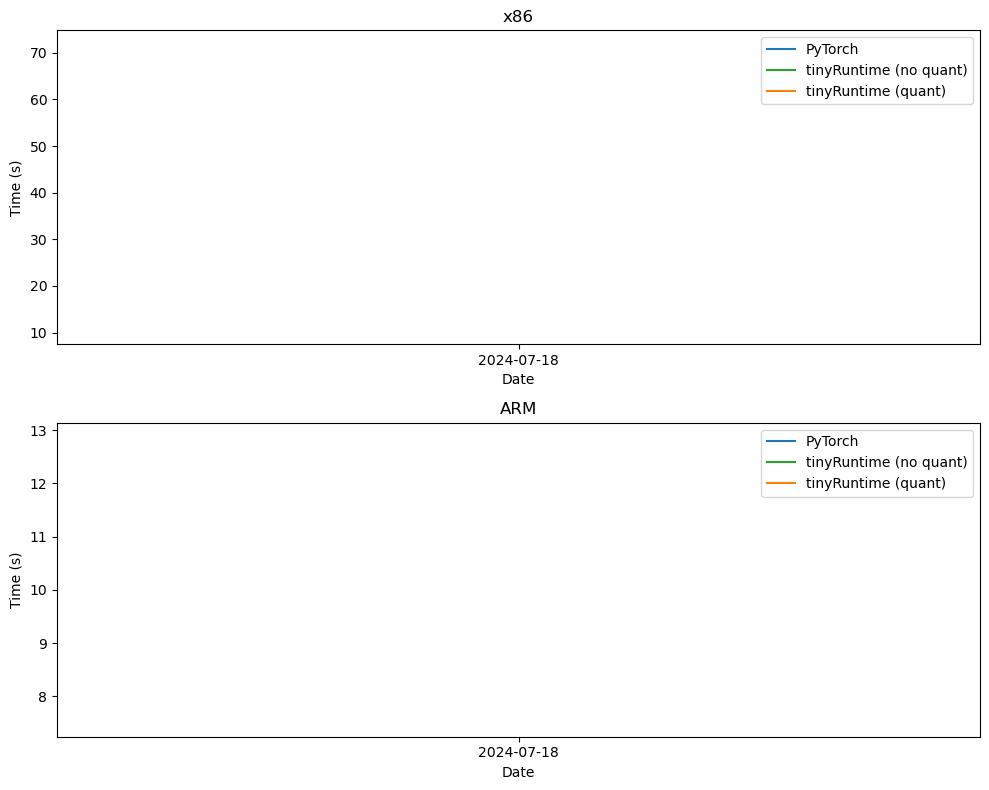

In [170]:
#| label: fig-time
#| fig-cap: "Runtime performance improvement over time"

def plot_progress(ax, df):
    '''Plot evolution of execution time'''
    df_pytorch, df_trv, df_trq = split_dataframe(df)
    ax.plot(df_pytorch["Date"], df_pytorch["Time"], "tab:blue", label='PyTorch')
    ax.plot(df_trv["Date"], df_trv["Time"], "tab:green", label='tinyRuntime (no quant)')
    ax.plot(df_trq["Date"], df_trq["Time"], "tab:orange", label='tinyRuntime (quant)')
    ax.set_ylabel("Time (s)")
    ax.set_xlabel("Date")
    ax.legend()

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot for x86
plot_progress(axs[0], df_x86)
axs[0].set_title('x86')

# Plot for ARM
plot_progress(axs[1], df_arm)
axs[1].set_title('ARM')

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()